**My goal is predicting taxi fare. <br>
I think fare is made of two factors about space and time. If space or time is changed , fare is also changed.<br>
So I focus on finding factors about space and time.<br>
Let's go !!!!!**

"# 2. Refine Data <br>
"## 2-1. Pickup/Dropoff Longitude/Latitude<br>
"## 2-2. Missing Values<br>
"## 2-3.Passenger_count<br>
<br>
"# 3. Hypothesis<br>
"## 3-1. Is New variable 'dist' related with fare_amount?<br>
"## 3-2. When fare_amount <=0 is, Is 'dist' near 0 ?<br>
"## 3-3. Time Series<br>
"### 3-3-1. Is fare_amount different by year ?<br>
"### 3-3-2. Is fare_amount different by month ?<br>
"### 3-3-3. Is fare_amount different by whether is evening or not? <br>
"### 3-3-4. Is fare_amount different by weekend or weekday ? <br>
<br>
"## 3-4. Is fare_amount related with passenger_count ?<br>
"## 3-5. Is  fare_amount related with Airport ?<br>
"## 3-6. Is fare_amount related with in city or out city ?<br>
<br>
"# 4. Modeling<br>
"## 4-0. Summary<br>
"## 4-1. Dummy <br>
"## 4-2.modeling<br>
<br>
"# 5. Improving model<br>
"# 6. Result<br>

# 0.Prepare

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sample_submission.csv
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/GCP-Coupons-Instructions.rtf


# 1.Data load

In [3]:
#train=pd.read_csv("/kaggle/input/train.csv",nrows=1000000)
train=pd.read_csv("/kaggle/input/train.csv",index_col='pickup_datetime',parse_dates=True,nrows=1000000)

In [4]:
test=pd.read_csv("/kaggle/input/test.csv",index_col='pickup_datetime',parse_dates=True)
#test=pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2009-06-15 17:26:21+00:00 to 2009-12-31 14:30:00+00:00
Data columns (total 7 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 61.0+ MB


categorizing variables into 
    1. Space factors : pickup_longitude ,pickup_latitude , dropoff_longitude , dropoff_latitude 
    2. time : key 
    3. etc : passenger_count
    4. goal : fare_amount

In [6]:
train.head(3)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2


In [7]:
#train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'])

In [8]:
test.head(3)

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,
2015-01-27 13:08:24+00:00,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1
2015-01-27 13:08:24+00:00,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1
2011-10-08 11:53:44+00:00,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9914 entries, 2015-01-27 13:08:24+00:00 to 2015-01-18 14:06:23+00:00
Data columns (total 6 columns):
key                  9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 542.2+ KB


In [10]:
#test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'])

In [11]:
pd.options.display.float_format = '{:.6f}'.format
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [12]:
test_desc=test.describe()
test_desc

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# 2. Refine Data 

## 2-1. Pickup/Dropoff Longitude/Latitude

2-1-1. reset train range depend on test range

In [13]:
lon_min=min(test_desc['pickup_longitude']['min'],test_desc['dropoff_longitude']['min']);
lon_max=max(test_desc['pickup_longitude']['max'],test_desc['dropoff_longitude']['max']);
lat_min=min(test_desc['pickup_latitude']['min'],test_desc['dropoff_latitude']['min']);
lat_max=min(test_desc['pickup_latitude']['max'],test_desc['dropoff_latitude']['max']);
lon_min,lon_max,lat_min,lat_max

(-74.263242, -72.986532, 40.568973, 41.696683)

In [14]:
train[(train['pickup_longitude']>lon_max) | (train['pickup_longitude'] <lon_min) | (train['dropoff_longitude'] > lon_max) | (train['dropoff_latitude'] < lat_min)]

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,,
2012-12-24 11:24:00+00:00,2012-12-24 11:24:00.00000098,5.500000,0.000000,0.000000,0.000000,0.000000,3
2013-11-23 12:57:00+00:00,2013-11-23 12:57:00.000000190,5.000000,0.000000,0.000000,0.000000,0.000000,1
2011-02-07 20:01:00+00:00,2011-02-07 20:01:00.000000114,6.500000,0.000000,0.000000,0.000000,0.000000,1
2013-01-17 17:22:00+00:00,2013-01-17 17:22:00.00000043,8.000000,0.000000,0.000000,0.000000,0.000000,2
2010-09-05 17:08:00+00:00,2010-09-05 17:08:00.00000092,3.700000,0.000000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...
2013-06-07 20:40:21+00:00,2013-06-07 20:40:21.0000003,8.000000,0.000000,0.000000,0.000000,0.000000,2
2013-03-03 13:18:00+00:00,2013-03-03 13:18:00.000000227,3.500000,0.000000,0.000000,0.000000,0.000000,6
2014-05-04 23:27:00+00:00,2014-05-04 23:27:00.000000103,9.000000,0.000000,0.000000,0.000000,0.000000,6


In [15]:
train=train[~((train['pickup_longitude']>lon_max) | (train['pickup_longitude'] <lon_min) | (train['dropoff_longitude'] > lon_max) | (train['dropoff_longitude'] < lon_min)
             | (train['pickup_latitude']>lat_max) | (train['pickup_latitude'] <lat_min) | (train['dropoff_latitude'] > lat_max) | (train['dropoff_latitude'] < lat_min))]
train.head(3)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2


## 2-2. Missing Values

In [16]:
train=train.dropna()

## 2-3.Passenger_count

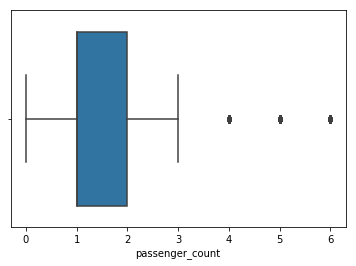

In [17]:
sns.boxplot(x='passenger_count',data=train)

In [18]:
train.passenger_count.value_counts()

1    676474
2    145205
5     69075
3     42860
4     20996
6     20759
0      3482
Name: passenger_count, dtype: int64

In [19]:
train[train['passenger_count']==0]

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,,
2015-06-02 23:16:15+00:00,2015-06-02 23:16:15.00000012,34.000000,-73.974899,40.751095,-73.908546,40.881878,0
2012-01-28 21:33:18+00:00,2012-01-28 21:33:18.0000002,4.900000,-73.955322,40.782840,-73.955797,40.773673,0
2012-02-27 07:24:20+00:00,2012-02-27 07:24:20.0000003,6.500000,-73.983397,40.738183,-73.971395,40.758023,0
2011-05-25 23:58:48+00:00,2011-05-25 23:58:48.0000001,13.300000,-73.998360,40.740348,-73.946455,40.777348,0
2011-10-23 11:09:28+00:00,2011-10-23 11:09:28.0000001,10.100000,-73.971400,40.795000,-73.967900,40.768600,0
...,...,...,...,...,...,...,...
2011-09-22 15:16:33+00:00,2011-09-22 15:16:33.0000001,11.700000,-73.975200,40.765300,-73.961100,40.806600,0
2011-07-09 17:23:58+00:00,2011-07-09 17:23:58.0000002,3.300000,-73.986900,40.761600,-73.982700,40.765500,0
2011-01-19 15:46:03+00:00,2011-01-19 15:46:03.0000001,6.900000,-73.991477,40.730023,-73.993657,40.744948,0


According to Test passenger_count range, I drop out of the range.

In [20]:
train=train[(train['passenger_count']>=1) & (train['passenger_count']<=6)]
train

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_datetime,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2
2012-04-21 04:30:42+00:00,2012-04-21 04:30:42.0000001,7.700000,-73.987130,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00+00:00,2010-03-09 07:51:00.000000135,5.300000,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
2014-09-13 21:44:38+00:00,2014-09-13 21:44:38.0000001,7.000000,-73.976676,40.785630,-73.959196,40.775114,1
2010-09-20 14:50:37+00:00,2010-09-20 14:50:37.0000002,7.300000,-73.992103,40.671385,-73.992103,40.671385,2
2013-04-26 14:03:00+00:00,2013-04-26 14:03:00.000000118,10.500000,-73.978423,40.751135,-73.993397,40.762197,5


# 3. Hypothesis
## 3-1. Is New variable 'dist' related with fare_amount?
 Definition  'dist' :  https://en.wikipedia.org/wiki/Haversine_formula
 

In [21]:
"""Referenced from (https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points (by Michael Dunn))"""

from math import radians, cos, sin, asin, sqrt

def distance(lat1,lon1,lat2,lon2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [22]:
train['dist'] =  np.vectorize(distance)(train['pickup_latitude'],train['pickup_longitude'],train['dropoff_latitude'],train['dropoff_longitude'])
#from haversine import haversine, Unit #(lat, lon)
#train['dist']=train.apply(lambda a:haversine((a.pickup_latitude,a.pickup_longitude),(a.dropoff_latitude,a.dropoff_longitude), unit='mi'),axis=1)

In [23]:
train.head(3)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
pickup_datetime,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525


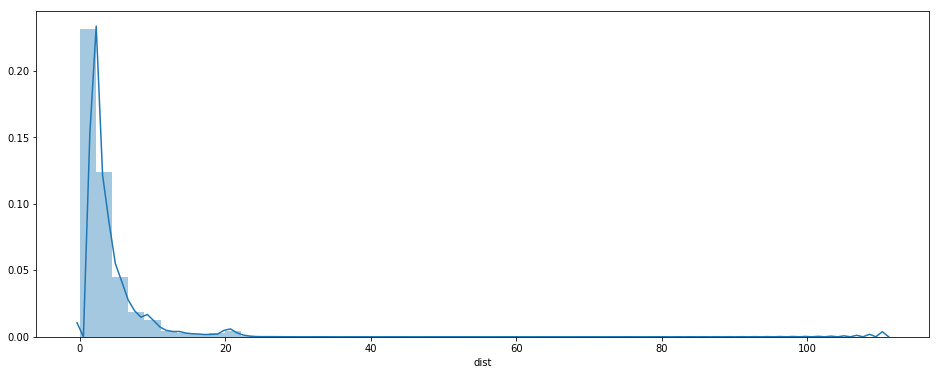

In [24]:
f, ax = plt.subplots(figsize=(16, 6))
sns.distplot(train.dist)

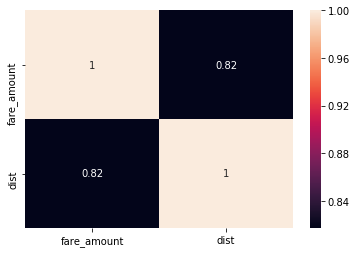

In [25]:
sns.heatmap(train[['fare_amount','dist']].corr(),annot=True)

### * ** Yes,fare_amount is related with dist***

## 3-2. When fare_amount <=0 is, Is 'dist' near 0 ?

In [26]:
train_a=train[train.fare_amount == 0]
train_b=train[train.fare_amount < 0]
print(train_a.shape[0] ,',',train_b.shape[0])

24 , 34


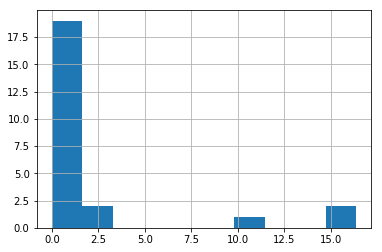

In [27]:
train_a.dist.hist()

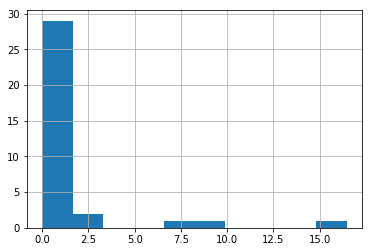

In [28]:
train_b.dist.hist()

### * ** Yes, when fare_amount < 0 is , dist is near 0 ***

In [29]:
train[train.fare_amount < 0] = 0
train[train.fare_amount < 0].shape[0]

0

## 3-3. Time Series

### 3-3-1. Is fare_amount different by year ?

In [30]:
train_f=train.fare_amount
#train_f.plot()

/opt/conda/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


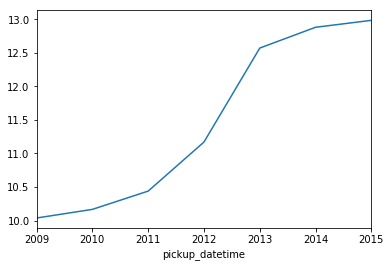

In [31]:
train_f.resample('Y').mean().plot()

In [32]:
train_f.groupby(train_f.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
pickup_datetime,,,,,,,,
2009,151990.000000,10.037697,8.152858,2.500000,5.700000,7.700000,11.300000,200.000000
2010,147543.000000,10.166434,8.338316,0.000000,5.700000,7.700000,11.300000,167.090000
2011,152554.000000,10.439090,8.792013,2.500000,5.700000,7.700000,11.700000,500.000000
2012,155958.000000,11.170754,9.548840,2.500000,6.000000,8.500000,12.500000,450.000000
2013,152990.000000,12.572314,10.624514,0.000000,6.500000,9.500000,14.000000,250.250000
2014,145834.000000,12.882203,10.964487,0.000000,6.500000,9.500000,14.500000,215.000000
2015,68500.000000,12.985703,11.421358,0.000000,6.500000,9.500000,14.500000,450.000000


In [33]:
train['year']=train.index.year
train.head(1)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year
pickup_datetime,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009


I try comparing groups by year with 1-way ANONA. To do this, I try testing nomality.

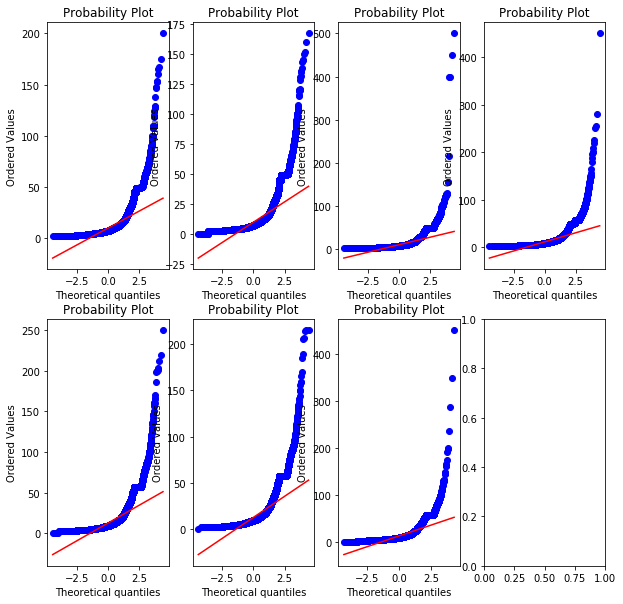

In [34]:
import scipy.stats as sp
fig,ax=plt.subplots(2,4,figsize=(10,10))
for j in range(2):
    for i in range(4):
        if j==1 and i==3 :
            break
        year=2009+i+(j*4)
        sp.probplot(train[train['year']==year].fare_amount, plot=ax[j,i])


It doesn't matched as normality test. So Use Kruskal-Wallis Test known as non-parametic comparing groups method.

In [35]:
'''Referenced from ( https://stackoverflow.com/questions/51632900/pandas-apply-kruskal-wallis-to-numeric-columns )'''
sp.mstats.kruskalwallis(*[group["fare_amount"].values for name, group in train.groupby("year")])

KruskalResult(statistic=23255.70440684511, pvalue=0.0)

As a result, fare_amount Groups by year are different.

### 3-3-2. Is fare_amount different by month ?

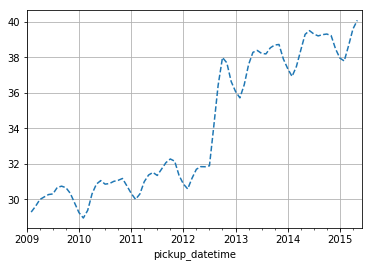

In [36]:
monthly=train_f.resample('M').mean()
monthly.rolling(3,center=True).sum().plot(style=['--'])
plt.grid(True)

In [37]:
train['month']=train.index.month
train.head(1)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month
pickup_datetime,,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6


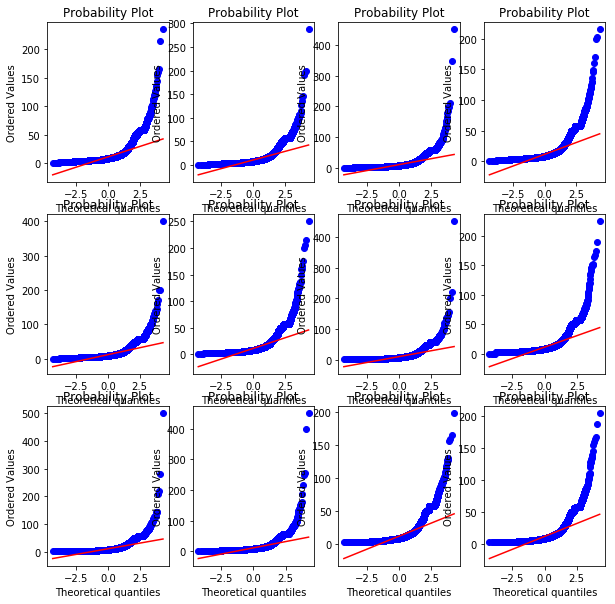

In [38]:
fig,ax=plt.subplots(3,4,figsize=(10,10))
for j in range(3):
    for i in range(4):
        month=1+i+(j*4)
        sp.probplot(train[train['month']==month].fare_amount, plot=ax[j,i])

In [39]:
'''Referenced from ( https://stackoverflow.com/questions/51632900/pandas-apply-kruskal-wallis-to-numeric-columns )'''
sp.mstats.kruskalwallis(*[group["fare_amount"].values for name, group in train.groupby("month")])

KruskalResult(statistic=1611.5944999804144, pvalue=0.0)

### 3-3-3. Is fare_amount different by whether is evening or not? 


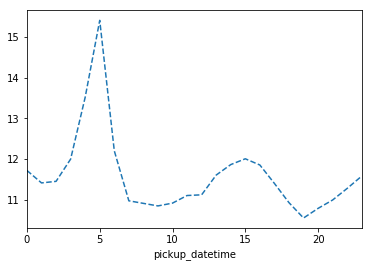

In [40]:
by_time=train_f.groupby(train_f.index.hour).mean()
by_time.plot(style=['--'])

I guess 20~6AM is evening, beause 20 PM fare_amount is going up , and 6am fare_amount is stopping.

In [41]:
train['evening']=train.index.hour
train['evening'].head(10)

pickup_datetime
2009-06-15 17:26:21+00:00    17
2010-01-05 16:52:16+00:00    16
2011-08-18 00:35:00+00:00     0
2012-04-21 04:30:42+00:00     4
2010-03-09 07:51:00+00:00     7
2011-01-06 09:50:45+00:00     9
2012-11-20 20:35:00+00:00    20
2012-01-04 17:22:00+00:00    17
2012-12-03 13:10:00+00:00    13
2009-09-02 01:11:00+00:00     1
Name: evening, dtype: int64

In [42]:
train['evening']=np.vectorize(lambda x: 1 if (x<=6 or x>=20 ) else 0)(train.evening)

In [43]:
train['evening'].value_counts()

0    615083
1    360286
Name: evening, dtype: int64

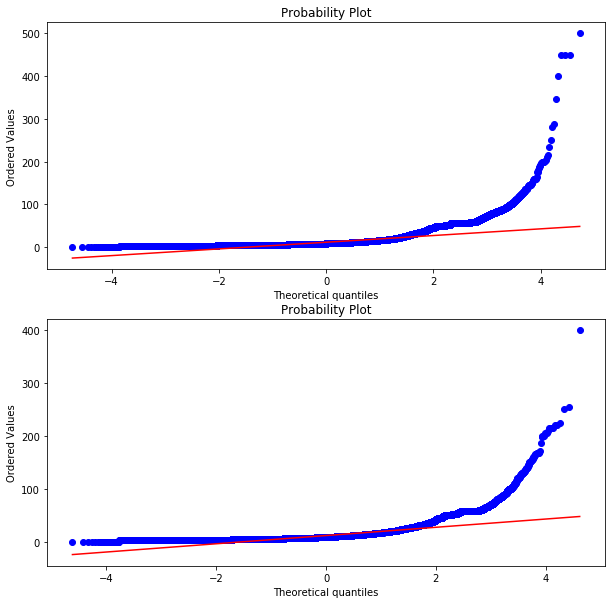

In [44]:
fig,ax=plt.subplots(2,figsize=(10,10))
for j in range(2):
    sp.probplot(train[train['evening']==j].fare_amount, plot=ax[j])

In [45]:
sp.mstats.kruskalwallis(*[group["fare_amount"].values for name, group in train.groupby("evening")])

KruskalResult(statistic=1315.9619061380545, pvalue=3.84142086871634e-288)

### 3-3-4. Is fare_amount different by dayofweek ? 

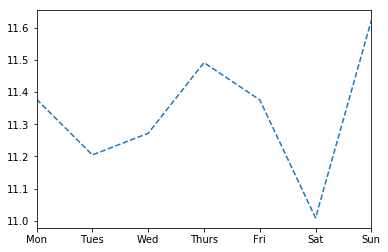

In [46]:
by_weekday= train_f.groupby(train_f.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=['--'])

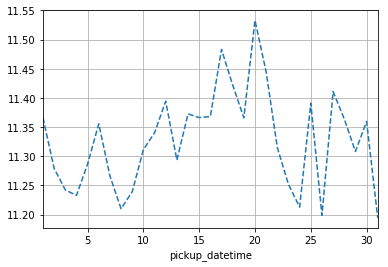

In [47]:
by_date=train_f.groupby(train_f.index.day).mean()
by_date.plot(style=['--'])
plt.grid(True)

I guess fare_amount is changed by dayofweek according to two graphs above

In [48]:
train['dayofweek'] = train.index.dayofweek
train.dayofweek = train.dayofweek.map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
train.head(5)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month,evening,dayofweek
pickup_datetime,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Mon
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,0,Tues
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,1,Thurs
2012-04-21 04:30:42+00:00,2012-04-21 04:30:42.0000001,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,1,Sat
2010-03-09 07:51:00+00:00,2010-03-09 07:51:00.000000135,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,0,Tues


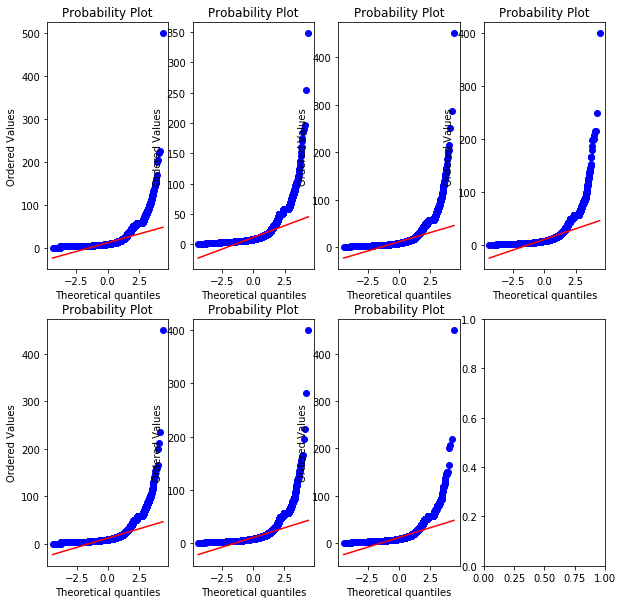

In [49]:
fig,ax=plt.subplots(2,4,figsize=(10,10));dayofweek=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
count=0
for j in range(2):
    for i in range(4):
        if count <=6:
            sp.probplot(train[train['dayofweek']==dayofweek[count]].fare_amount, plot=ax[j,i])
            count+=1

In [50]:
sp.mstats.kruskalwallis(*[group["fare_amount"].values for name, group in train.groupby("dayofweek")])

KruskalResult(statistic=370.59021118048526, pvalue=5.844448370154635e-77)

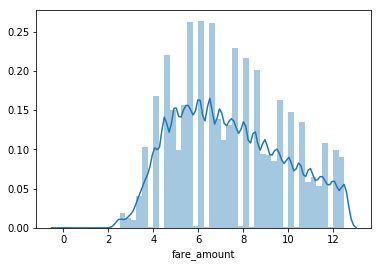

In [51]:
sns.distplot(train[train.fare_amount <= 12.5].fare_amount)

## 3-4. Is fare_amount related with passenger_count ?

In [52]:
train.groupby(['passenger_count']).fare_amount.mean()

passenger_count
0    0.000000
1   11.197905
2   11.785536
3   11.492372
4   11.695422
5   11.193585
6   12.264027
Name: fare_amount, dtype: float64

## 3-5. Is  fare_amount related with Airport ?
LaGuardia Airport : 40.776967 , -73.874044
      JFK Airport : 40.648433 , -73.783051
      
  1 km > 0.621371 mi

In [53]:
LgAirLog=-73.874044 ; LgAirLat=40.776967 ; JfkAirLog=-73.783051 ; JfkAirLat = 40.648433

In [54]:
train['LgAirPickDist']=np.vectorize(distance)(train['pickup_latitude'],train['pickup_longitude'], LgAirLat , LgAirLog)
train['LgAirDropDist']=np.vectorize(distance)(train['dropoff_latitude'],train['dropoff_longitude'], LgAirLat , LgAirLog)
train['JfkAirPickDist']=np.vectorize(distance)(train['pickup_latitude'],train['pickup_longitude'], JfkAirLat , JfkAirLog)
train['JfkAirDropDist']=np.vectorize(distance)(train['dropoff_latitude'],train['dropoff_longitude'], JfkAirLat , JfkAirLog)

In [55]:
train.head(3)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month,evening,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist
pickup_datetime,,,,,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Mon,6.675470,7.694570,9.610696,8.647730
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,0,Tues,14.015265,8.877548,20.854379,22.227933
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,1,Thurs,9.318392,10.297847,20.994244,20.904384


I wonder There are  [JFK Air port - manhattan ] taxi driving and its fare .

In [56]:
train_a=train[(train.JfkAirPickDist <= 2) | (train.JfkAirDropDist <= 2)]

In [57]:
train_a[['dist','fare_amount']].describe()

,dist,fare_amount
count,20900.000000,20900.000000
mean,17.709441,45.606776
std,6.236529,15.262911
min,0.000000,0.000000
25%,16.406525,42.000000
50%,20.006025,49.800000
75%,20.965829,56.800000
max,98.333655,287.080000


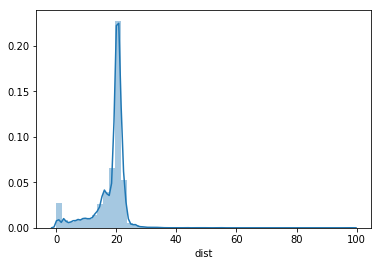

In [58]:
sns.distplot(train_a.dist)

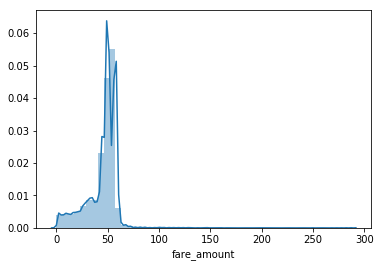

In [59]:
sns.distplot(train_a.fare_amount)

In [60]:
train_b=train[(train.LgAirDropDist <= 2) | (train.LgAirPickDist <= 2)]

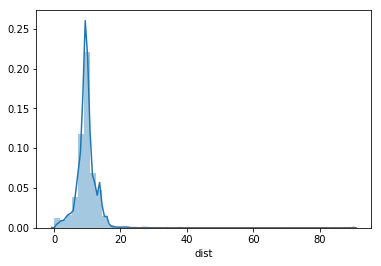

In [61]:
sns.distplot(train_b.dist)

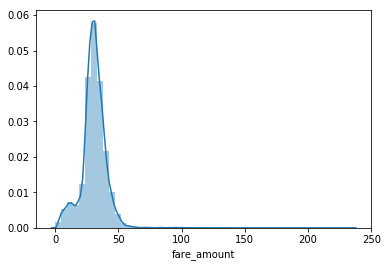

In [62]:
sns.distplot(train_b.fare_amount)

In [63]:
#Referenced from ( https://thenotes.tistory.com/entry/Ttest-in-python [NOTES] )
from scipy import stats

tTest_Result= stats.ttest_ind(train[train.JfkAirDropDist <= 2].fare_amount,train[train.JfkAirDropDist > 2].fare_amount, equal_var=False) 
print("The t-statistic and p-value assuming unequal variances is %.3f and %.3f." % tTest_Result)


The t-statistic and p-value assuming unequal variances is 194.884 and 0.000.


In [64]:
tTest_Result= stats.ttest_ind(train[train.JfkAirPickDist <= 2].fare_amount,train[train.JfkAirPickDist > 2].fare_amount, equal_var=False) 
print("The t-statistic and p-value assuming unequal variances is %.3f and %.3f." % tTest_Result)


The t-statistic and p-value assuming unequal variances is 233.783 and 0.000.


In [65]:
tTest_Result= stats.ttest_ind(train[train.LgAirDropDist <= 2].fare_amount,train[train.LgAirDropDist > 2].fare_amount, equal_var=False) 
print("The t-statistic and p-value assuming unequal variances is %.3f and %.3f." % tTest_Result)


The t-statistic and p-value assuming unequal variances is 233.712 and 0.000.


In [66]:
tTest_Result= stats.ttest_ind(train[train.LgAirPickDist <= 2].fare_amount,train[train.LgAirPickDist > 2].fare_amount, equal_var=False) 
print("The t-statistic and p-value assuming unequal variances is %.3f and %.3f." % tTest_Result)


The t-statistic and p-value assuming unequal variances is 242.977 and 0.000.


In [67]:
train['LgAirPickDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(train['LgAirPickDist'])
train['LgAirDropDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(train['LgAirDropDist'])
train['JfkAirPickDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(train['JfkAirPickDist'])
train['JfkAirDropDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(train['JfkAirDropDist'])

* ###  There is difference Whether airport is near 

## 3-6. Is fare_amount related with in city or out city ?
### step1.Devide regions

In [68]:
r1={'south':40.557246 ,'north':40.64994 , 'west':-74.213979 , 'east':-74.053616 } ;
r2={'south':40.496008 ,'north':r1['south'] , 'west': -74.255730 , 'east': -74.101707 };
r3={'south':40.701027 ,'north':40.748349 , 'west': -74.019548 , 'east': -73.967354 };
r4={'south':r3['north'] ,'north':40.766704 , 'west': -74.010367 , 'east': -73.929445 };
r5={'south':r4['north'] ,'north':40.796729 , 'west': -73.997547 , 'east': -73.929445 };
r6={'south':r5['north'] ,'north':40.911176 , 'west': -73.976801 , 'east': -73.929445 };
r7={'south':r5['south'] ,'north':40.915690 , 'west': r6['east'] , 'east': -73.781091 };
r8={'south':40.739446 ,'north':r4['south'] , 'west': r3['east'] , 'east': -73.942672 };
r9={'south': 40.570376 ,'north':r3['south'] , 'west':  -74.041803 , 'east': -73.856216 };
r10={'south': r9['north'] ,'north':r8['south'] , 'west':  r3['east'] , 'east': r8['east'] };
r11={'south': r4['south'] ,'north':r7['south'] , 'west':  r4['east'] , 'east':-73.764818 };
r12={'south': r10['south'] ,'north':r11['south'] , 'west':  r10['east'] , 'east':-73.700318 };
r13={'south': r9['south'] ,'north': r12['south'] , 'west':  r9['east'] , 'east':-73.725710 };
r14={'south': 40.543202 ,'north': r13['south'] , 'west':  -73.940431 , 'east':-73.844121 }; 
areaList=[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14] 

In [69]:
West = -74.257159 ; East = -73.699215 ; North = 40.915568 ; South = 40.495992 ;
train[((train.pickup_longitude < West) | (train.pickup_longitude > East)) & ((train.pickup_latitude < South) | (train.pickup_latitude > North))]

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month,evening,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist
pickup_datetime,,,,,,,,,,,,,,,,
2009-08-07 21:49:13+00:00,2009-08-07 21:49:13.0000003,165.000000,-73.633363,41.032490,-73.633671,41.032598,1,0.028489,2009,8,1,Fri,0,0,0,0
2009-05-02 19:01:01+00:00,2009-05-02 19:01:01.0000002,2.500000,-73.137393,41.366138,-73.996510,40.745320,2,99.771579,2009,5,0,Sat,0,0,0,0
2010-03-09 23:37:10+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,2010,3,1,Tues,0,0,0,0
2015-03-22 05:14:27+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,2015,3,1,Sun,0,0,0,0
2009-01-06 10:53:36+00:00,2009-01-06 10:53:36.0000004,6.900000,-73.137393,41.366138,-73.974598,40.751311,1,97.985088,2009,1,0,Tues,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-04-30 11:34:15+00:00,2010-04-30 11:34:15.0000001,4.100000,-73.137393,41.366138,-73.137393,41.366138,1,0.000000,2010,4,0,Fri,0,0,0,0
2009-10-22 06:51:36+00:00,2009-10-22 06:51:36.0000001,9.700000,-73.137393,41.366138,-74.006365,40.742378,1,100.596245,2009,10,1,Thurs,0,0,0,0
2009-06-11 22:17:19+00:00,2009-06-11 22:17:19.0000002,13.700000,-73.137393,41.366138,-73.137393,41.366138,2,0.000000,2009,6,1,Thurs,0,0,0,0


In [70]:
def CheckArea(lat,lon):
    for num,area in enumerate(areaList):
        if ( (area['west'] <= lon )& (area['east'] > lon)  & (area['south'] <= lat) & (area['north'] > lat) ):
            return str(num+1)
    return 0

# In -> In : 0 ,  In -> Out : 1 , Out -> In : 2 , Out -> Out : 3
def IsBorderChange(pickArea,dropArea):
    if pickArea == '0':
        if dropArea =='0':
            return '3'
        else:
            return '2'
    else:
        if dropArea =='0':
            return '1'
        else:
            return '0'

In [71]:
train['pickupArea'] =  np.vectorize(CheckArea)(train['pickup_latitude'],train['pickup_longitude'])
train['dropoffArea'] =  np.vectorize(CheckArea)(train['dropoff_latitude'],train['dropoff_longitude'])
train['BorderChange'] = np.vectorize(IsBorderChange)(train['pickupArea'],train['dropoffArea'])
train.head(5)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month,evening,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist,pickupArea,dropoffArea,BorderChange
pickup_datetime,,,,,,,,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Mon,0,0,0,0,12,12,0
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,0,Tues,0,0,0,0,3,5,0
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,1,Thurs,0,0,0,0,4,4,0
2012-04-21 04:30:42+00:00,2012-04-21 04:30:42.0000001,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,1,Sat,0,0,0,0,3,4,0
2010-03-09 07:51:00+00:00,2010-03-09 07:51:00.000000135,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,0,Tues,0,0,0,0,5,5,0


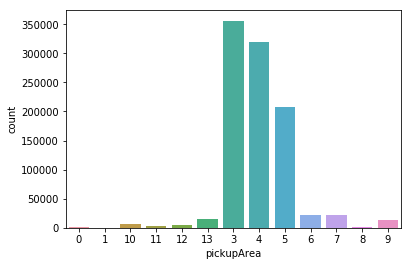

In [72]:
sns.countplot(x="pickupArea",data=train)
#train['pickupArea'].value_counts()

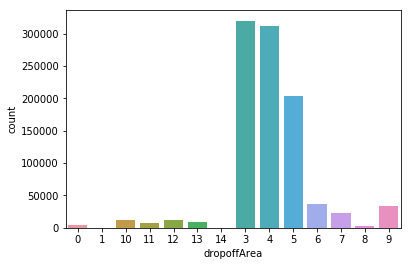

In [73]:
sns.countplot(x="dropoffArea",data=train)
#train['dropoffArea'].value_counts()

0    970355
1      2818
3      1751
2       445
Name: BorderChange, dtype: int64

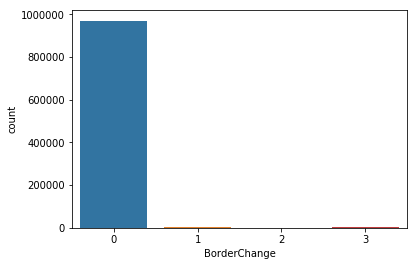

In [74]:
'''# In -> In : 0 ,  In -> Out : 1 , Out -> In : 2 , Out -> Out : 3'''
sns.countplot(x="BorderChange",data=train)
train.BorderChange.value_counts()

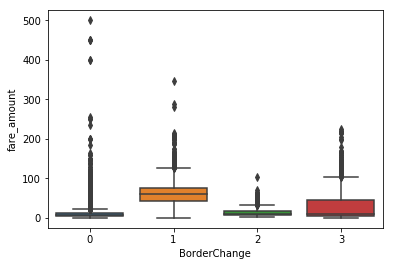

In [75]:
sns.boxplot(x="BorderChange",y='fare_amount',data=train)

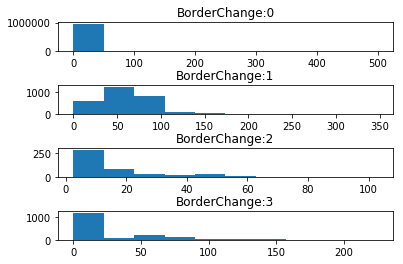

In [76]:
fig,ax=plt.subplots(4)
fig.subplots_adjust(hspace=1.2,wspace=0.4)
for num in range(4):
    obj=str(num)                  
    ax[num].hist(train[train['BorderChange']==obj].fare_amount)
    ax[num].set_title("BorderChange:{}".format(num))

plt.show()

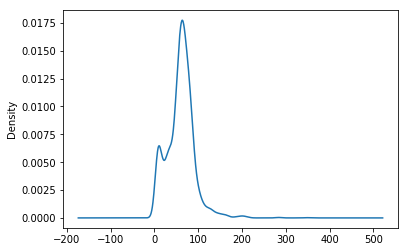

In [77]:
train[train['BorderChange']=='1'].fare_amount.plot(kind='kde')

# 4. Modeling

## 4-0. Summary

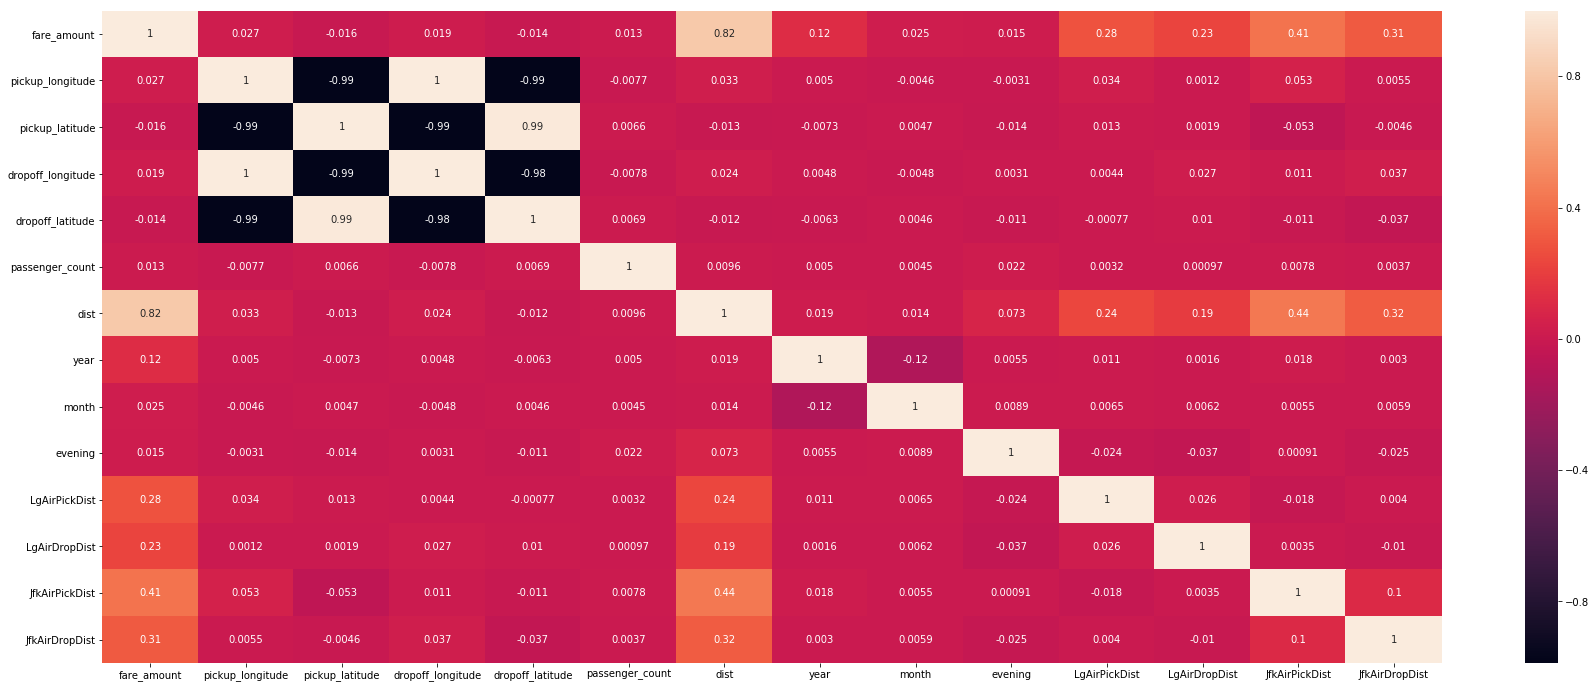

In [78]:
fig = plt.figure(figsize=(30,12))
sns.heatmap(train.corr(),annot=True)

In [79]:
train.head(3)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,month,evening,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist,pickupArea,dropoffArea,BorderChange
pickup_datetime,,,,,,,,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,Mon,0,0,0,0,12,12,0
2010-01-05 16:52:16+00:00,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,0,Tues,0,0,0,0,3,5,0
2011-08-18 00:35:00+00:00,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,1,Thurs,0,0,0,0,4,4,0


original variables .. 
    1. Space factors : pickup_longitude ,pickup_latitude , dropoff_longitude , dropoff_latitude 
    2. time : key 
    3. etc : passenger_count
    4. goal : fare_amount<br>
new variables ..
    1. Space factors : dist  , LgAirPickDist	LgAirDropDist	JfkAirPickDist	JfkAirDropDist , BorderChange ,pickupArea,dropoffArea
    2. time :  year, evening, dayofweek 
    4. goal : fare_amount<br>
    
And I drop some unhelpful variables like passenger_count according to correlation.

In [80]:
train=train.drop(['passenger_count','month','evening','pickupArea','dropoffArea','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','key'],axis=1)

In [81]:
train.head(3)

,fare_amount,dist,year,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist,BorderChange
pickup_datetime,,,,,,,,,
2009-06-15 17:26:21+00:00,4.500000,1.030764,2009,Mon,0,0,0,0,0
2010-01-05 16:52:16+00:00,16.900000,8.450134,2010,Tues,0,0,0,0,0
2011-08-18 00:35:00+00:00,5.700000,1.389525,2011,Thurs,0,0,0,0,0


In [82]:
test['dist'] =  np.vectorize(distance)(test['pickup_latitude'],test['pickup_longitude'],test['dropoff_latitude'],test['dropoff_longitude'])
test['year']=test.index.year
test['dayofweek'] = test.index.dayofweek;test.dayofweek = test.dayofweek.map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

test['LgAirPickDist']=np.vectorize(distance)(test['pickup_latitude'],test['pickup_longitude'], LgAirLat , LgAirLog)
test['LgAirDropDist']=np.vectorize(distance)(test['dropoff_latitude'],test['dropoff_longitude'], LgAirLat , LgAirLog)
test['JfkAirPickDist']=np.vectorize(distance)(test['pickup_latitude'],test['pickup_longitude'], JfkAirLat , JfkAirLog)
test['JfkAirDropDist']=np.vectorize(distance)(test['dropoff_latitude'],test['dropoff_longitude'], JfkAirLat , JfkAirLog)

test['LgAirPickDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(test['LgAirPickDist'])
test['LgAirDropDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(test['LgAirDropDist'])
test['JfkAirPickDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(test['JfkAirPickDist'])
test['JfkAirDropDist']=np.vectorize(lambda x: 1 if x<=2 else 0)(test['JfkAirDropDist'])

test['pickupArea'] =  np.vectorize(CheckArea)(test['pickup_latitude'],test['pickup_longitude'])
test['dropoffArea'] =  np.vectorize(CheckArea)(test['dropoff_latitude'],test['dropoff_longitude'])
test['BorderChange'] = np.vectorize(IsBorderChange)(test['pickupArea'],test['dropoffArea'])

In [83]:
test.head(3)

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,year,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist,pickupArea,dropoffArea,BorderChange
pickup_datetime,,,,,,,,,,,,,,,,
2015-01-27 13:08:24+00:00,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,Tues,0,0,0,0,4,3,0
2015-01-27 13:08:24+00:00,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,Tues,0,0,0,0,3,3,0
2011-10-08 11:53:44+00:00,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,Sat,0,0,0,0,4,3,0


In [84]:
test=test.drop(['passenger_count','pickupArea','dropoffArea','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [85]:
test.head(1)

,key,dist,year,dayofweek,LgAirPickDist,LgAirDropDist,JfkAirPickDist,JfkAirDropDist,BorderChange
pickup_datetime,,,,,,,,,
2015-01-27 13:08:24+00:00,2015-01-27 13:08:24.0000002,2.323260,2015,Tues,0,0,0,0,0


# 4. Modeling

## 4-1. Dummy 

In [86]:
new_train=pd.get_dummies(train[['dist','year','dayofweek','LgAirPickDist','LgAirDropDist','JfkAirPickDist','JfkAirDropDist','BorderChange']],
                         columns=['year','dayofweek','LgAirPickDist','LgAirDropDist','JfkAirPickDist','JfkAirDropDist','BorderChange'])
new_train.head(3)

,dist,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,dayofweek_Fri,dayofweek_Mon,...,LgAirDropDist_0,LgAirDropDist_1,JfkAirPickDist_0,JfkAirPickDist_1,JfkAirDropDist_0,JfkAirDropDist_1,BorderChange_0,BorderChange_1,BorderChange_2,BorderChange_3
pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,1.030764,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0
2010-01-05 16:52:16+00:00,8.450134,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
2011-08-18 00:35:00+00:00,1.389525,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [87]:
test=pd.get_dummies(test[['dist','year','dayofweek','LgAirPickDist','LgAirDropDist','JfkAirPickDist','JfkAirDropDist','BorderChange','key']],
                         columns=['year','dayofweek','LgAirPickDist','LgAirDropDist','JfkAirPickDist','JfkAirDropDist','BorderChange'])

In [88]:
test.head(1)

,dist,key,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,dayofweek_Fri,...,LgAirDropDist_0,LgAirDropDist_1,JfkAirPickDist_0,JfkAirPickDist_1,JfkAirDropDist_0,JfkAirDropDist_1,BorderChange_0,BorderChange_1,BorderChange_2,BorderChange_3
pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-27 13:08:24+00:00,2.323260,2015-01-27 13:08:24.0000002,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0


## 4-2.modeling

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(new_train,train[['fare_amount']],random_state=10)

In [90]:
print(f'{train_x.shape[0]},{test_x.shape[0]},{train_y.shape[0]},{test_y.shape[0]} ') 

731526,243843,731526,243843 


In [91]:
train_y.head(3)

,fare_amount
pickup_datetime,
2012-01-13 01:42:26+00:00,8.500000
2010-07-06 20:48:30+00:00,5.700000
2013-11-28 21:35:09+00:00,14.000000


In [92]:
LinearReg=LinearRegression().fit(train_x,train_y)

In [93]:
print(f' coef: {LinearReg.coef_}, Intercept : {LinearReg.intercept_ } , score_train : {LinearReg.score(train_x,train_y)} ,  score_test : {LinearReg.score(test_x,test_y)}') 

 coef: [[ 1.80515304e+00 -2.70778894e+11 -2.70778894e+11 -2.70778894e+11
  -2.70778894e+11 -2.70778894e+11 -2.70778894e+11 -2.70778894e+11
   2.91057293e+12  2.91057293e+12  2.91057293e+12  2.91057293e+12
   2.91057293e+12  2.91057293e+12  2.91057293e+12 -1.60277152e+11
  -1.60277152e+11 -6.93919301e+11 -6.93919301e+11 -1.88938945e+12
  -1.88938945e+12 -5.99705629e+10 -5.99705629e+10  6.52383736e+11
   6.52383736e+11  6.52383736e+11  6.52383736e+11]], Intercept : [-4.88621304e+11] , score_train : 0.7488828619256312 ,  score_test : 0.7334989290655924


In [94]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor().fit(train_x,train_y)
print(f' score_train : {tree.score(train_x,train_y)} ,  score_test : {tree.score(test_x,test_y)}') 

 score_train : 0.9784689309406072 ,  score_test : 0.6545453710103926


In [95]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10,n_jobs=-1).fit(train_x,train_y)
print(f' score_train : {regr.score(train_x,train_y)} ,  score_test : {regr.score(test_x,test_y)}') 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 score_train : 0.831179203654252 ,  score_test : 0.802445402535115


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
regr2 = GradientBoostingRegressor().fit(train_x,train_y)
print(f' score_train : {regr2.score(train_x,train_y)} ,  score_test : {regr2.score(test_x,test_y)}') 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 score_train : 0.8141414312068853 ,  score_test : 0.799971545303191


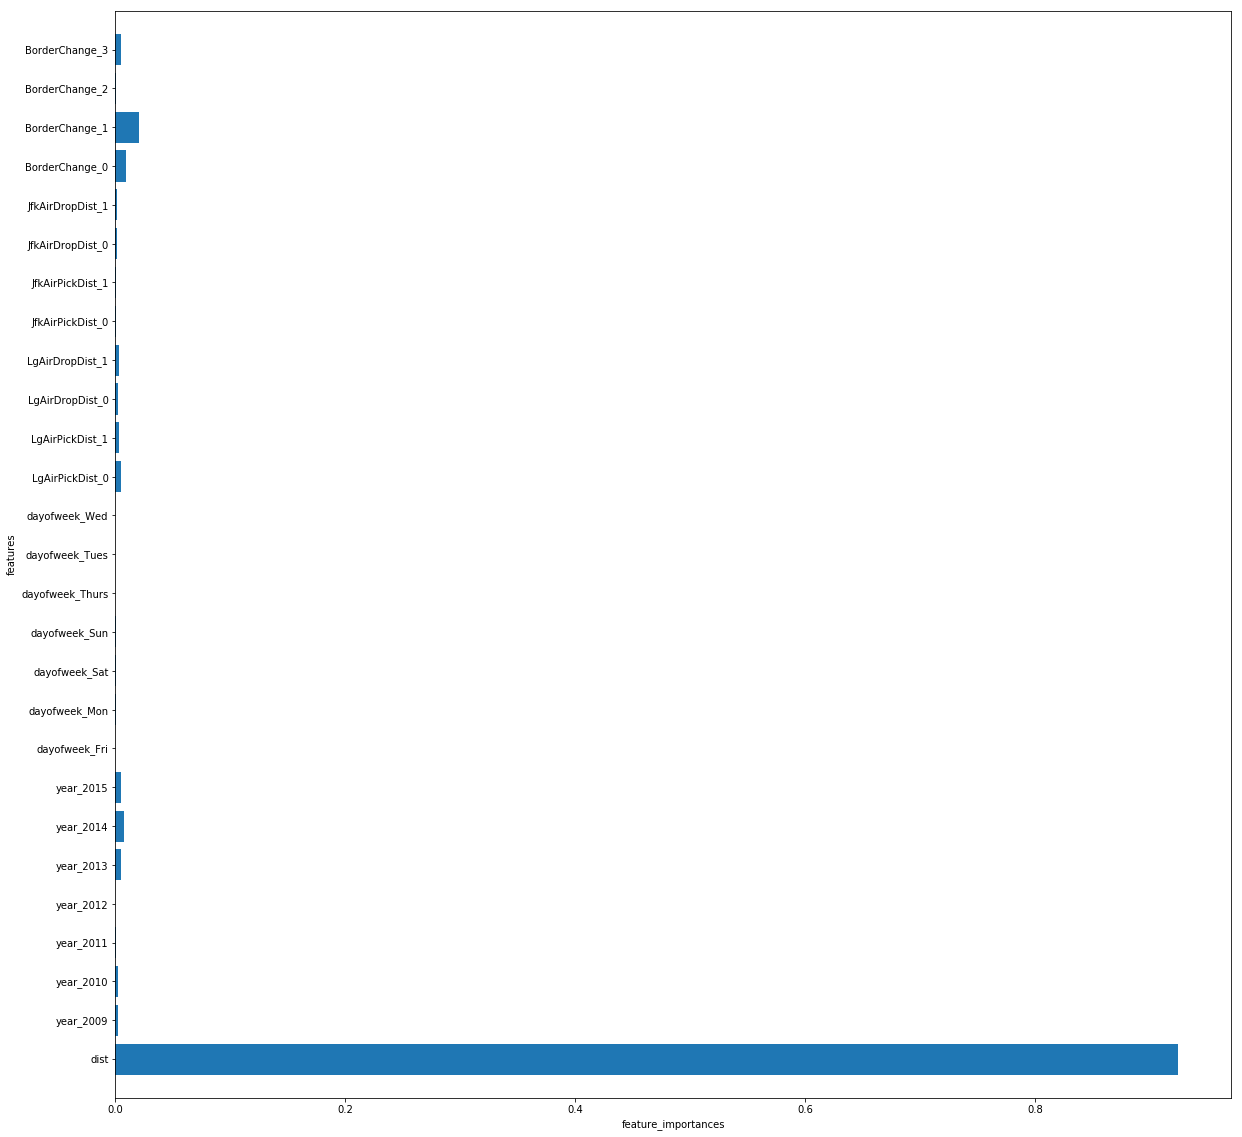

In [97]:
#Referenced From https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb
def plot_feature_importances(model,n_features):
    plt.figure(figsize=(20,20))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_x.columns)
    plt.xlabel("feature_importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_feature_importances(regr2,train_x.shape[1])

# 5. Improving model

In [98]:
#Referenced From ( https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb )

max_depth=[4,8,12];n_estimators=[5,10,15];max_features=["auto","sqrt","log2"]

best_score = 0
for depth in max_depth:
    for estimators in n_estimators:
        for featrues in max_features:
            regr = RandomForestRegressor(max_depth=depth,n_jobs=-1,n_estimators=estimators,max_features=featrues).fit(train_x,train_y)
            score = regr.score(test_x,test_y)
            if score > best_score:
                best_score = score
                best_parameters = {'max_depth': depth, 'n_estimators': estimators , 'max_features':featrues}
                        
print(f' score_test : {best_score} ,  score_test : {best_parameters}')             

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/con

 score_test : 0.8019794132036535 ,  score_test : {'max_depth': 12, 'n_estimators': 15, 'max_features': 'auto'}


# 6. Result

In [99]:
#Referenced from ( https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration )
test_key=test.key;test=test.drop(['key'],axis=1)
estimator = RandomForestRegressor(max_depth= 8, n_estimators= 10, max_features= 'auto').fit(train_x,train_y)
y_pred = estimator.predict(test)

submission = pd.DataFrame(
    {'key': test_key, 'fare_amount': y_pred},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
